In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pymaster as nmt

from astropy.io import fits
from pixell import curvedsky as cs, utils as putils

In [2]:
clgg_theory = np.loadtxt("cmass-theory-cls.txt", usecols=[1])

In [3]:
clgg_theory

array([0.00000000e+00, 0.00000000e+00, 5.94702113e-05, ...,
       2.41231764e-07, 2.41121171e-07, 2.41010646e-07])

In [4]:
_, ainfo = cs.prepare_ps(clgg_theory, lmax=3000)
alm = np.sqrt(0.5) * cs.rand_alm_white(ainfo)

In [5]:
C = np.array([[clgg_theory]])
C_halfpow = putils.eigpow(C, 0.5, axes=[0,1])

In [6]:
C_halfpow.shape

(1, 1, 3001)

In [7]:
g = cs.almxfl(np.array([alm]), C_halfpow).astype(np.complex128)[0]

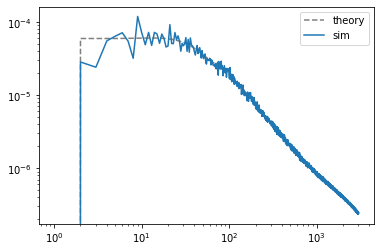

In [8]:
plt.loglog(clgg_theory, '--', color='grey', label='theory')
plt.loglog(hp.alm2cl(g,g), label='sim')
plt.legend()

In [9]:
def clgg_sim_alm(clgg_theory, lmax=3000):
    _, ainfo = cs.prepare_ps(clgg_theory, lmax=lmax)
    alm = np.sqrt(0.5) * cs.rand_alm_white(ainfo)
    C = np.array([[clgg_theory]])
    C_halfpow = putils.eigpow(C, 0.5, axes=[0,1])
    return cs.almxfl(np.array([alm]), C_halfpow).astype(np.complex128)[0]
    

In [17]:
sims = [clgg_sim_alm(clgg_theory) for i in range(400)]

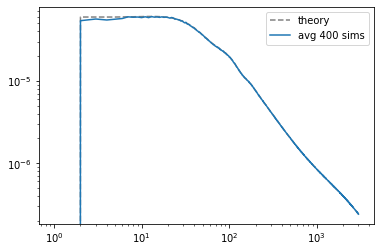

In [19]:
cls = []
for i in sims:
    cls.append(hp.alm2cl(i,i))

plt.loglog(clgg_theory, '--', color='grey', label='theory')
plt.loglog(np.mean(np.array(cls), axis=0), label='avg 400 sims')
plt.legend()

In [22]:
for i in range(len(sims)):
    hp.write_alm(f"galaxy_sims/cmass_galaxy_sims_{str(i+1)}.fits", sims[i], overwrite=True)

In [21]:
!rm -rf cmass_galaxy_sims_*.fits